In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
% matplotlib inline

pd.options.display.max_columns = 999
df_s = pd.read_csv("energy_data_variables_final_normalized.csv", usecols = ['DOLLAREL', 'DRYRUSEM', 'USEWASHM', 'TOTROOMS', 'LGTOUTNUM', 'BEDROOMS', 'DRYRFUEL', 'TOTSQFT_EN', 'NUMCFAN', 'TVCOLOR', 'WINDOWS', 'NCOMBATH', 'LGTINNUM', 'ELWATER', 'FUELH2O', 'OTHROOMS', 'WHEATAGE', 'NUMFRIG', 'NHSLDMEM', 'AGERFRI2', 'LOCRFRI2', 'FUELHEAT', 'THERMAINAC', 'NUMFREEZ', 'KWH_M'])

In [2]:
df_s.shape

(5686, 25)

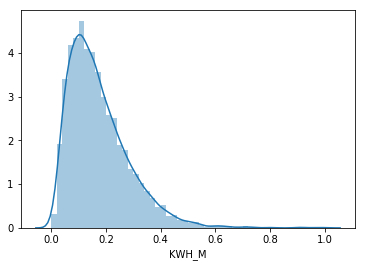

In [3]:
# Check Density Plot for Target Variable
ax = sns.distplot(df_s.KWH_M)
plt.show()

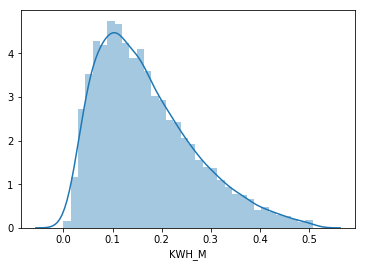

In [4]:
# Remove outliers that are more than 3 standard deviations from the mean 
df_s = df_s[np.abs(df_s["KWH_M"]-df_s["KWH_M"].mean())<=(3*df_s["KWH_M"].std())]

# Re-check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

In [5]:
df_s.shape

(5618, 25)

In [6]:
# Set X, Y Variables

X = df_s.values[:, 0:24]
Y = df_s.values[:, 24]

In [7]:
# Create For Loop to Cycle Through KNN Values

k_range = list(range(1, 31))
k_scores = []
for k in k_range: 
    knn = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 10, scoring = "neg_mean_squared_error")
    k_scores.append(scores.mean())
print (k_scores)

[-0.006584479964617413, -0.005040596883081784, -0.004589720519549895, -0.004390678819262901, -0.004273095104317113, -0.004191966549916883, -0.004145103773020322, -0.004126448846554153, -0.004132379080549652, -0.004121151493995661, -0.004105821345687322, -0.00409329591293816, -0.004101779967881232, -0.004120341413978675, -0.00413260670277424, -0.004146692551211652, -0.00416800890378574, -0.004172092411125798, -0.004189158792912255, -0.004198018058628445, -0.004212828505668282, -0.004220592385845536, -0.004226364280221305, -0.00423277264878935, -0.004239434569036106, -0.004251311377835899, -0.004260062017949893, -0.00427159552461798, -0.004279151307309466, -0.004291727562060704]


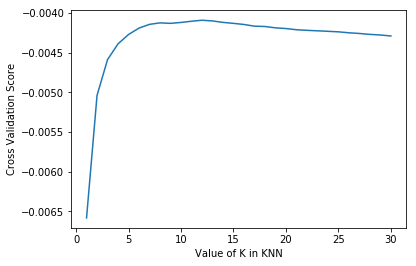

In [8]:
# Visualize a Plot of the Cross Val Scores vs. the Values of K for KNN 
plt.plot(k_range, k_scores)
plt.xlabel('Value of K in KNN')
plt.ylabel('Cross Validation Score')
plt.show()

In [9]:
from sklearn.grid_search import GridSearchCV

/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
k_range = list(range(1, 31))
print (k_range)
param_grid = dict(n_neighbors=k_range)
print (param_grid)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [11]:
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "neg_mean_squared_error")
grid.fit(X, Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=30, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [12]:
grid.grid_scores_

[mean: -0.00658, std: 0.00038, params: {'n_neighbors': 1},
 mean: -0.00504, std: 0.00038, params: {'n_neighbors': 2},
 mean: -0.00459, std: 0.00042, params: {'n_neighbors': 3},
 mean: -0.00439, std: 0.00034, params: {'n_neighbors': 4},
 mean: -0.00427, std: 0.00032, params: {'n_neighbors': 5},
 mean: -0.00419, std: 0.00031, params: {'n_neighbors': 6},
 mean: -0.00415, std: 0.00032, params: {'n_neighbors': 7},
 mean: -0.00413, std: 0.00029, params: {'n_neighbors': 8},
 mean: -0.00413, std: 0.00029, params: {'n_neighbors': 9},
 mean: -0.00412, std: 0.00031, params: {'n_neighbors': 10},
 mean: -0.00411, std: 0.00030, params: {'n_neighbors': 11},
 mean: -0.00409, std: 0.00029, params: {'n_neighbors': 12},
 mean: -0.00410, std: 0.00030, params: {'n_neighbors': 13},
 mean: -0.00412, std: 0.00031, params: {'n_neighbors': 14},
 mean: -0.00413, std: 0.00031, params: {'n_neighbors': 15},
 mean: -0.00415, std: 0.00032, params: {'n_neighbors': 16},
 mean: -0.00417, std: 0.00030, params: {'n_neighb

In [13]:
print (grid.grid_scores_[0].parameters)
print (grid.grid_scores_[0].cv_validation_scores)
print (grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[-0.00713315 -0.00600368 -0.00682928 -0.00657727 -0.00654835 -0.00626729
 -0.00696379 -0.00693284 -0.00663762 -0.00595152]
-0.006584583171715557


In [14]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print (grid_mean_scores)

[-0.006584583171715557, -0.0050406918373534166, -0.004589819297843085, -0.004390721275658397, -0.004273147019752062, -0.004191980734189939, -0.004145114810089141, -0.004126449934865543, -0.0041323690136355245, -0.00412114187008245, -0.004105820961146286, -0.004093296445060072, -0.004101776660586328, -0.004120349905465881, -0.0041326172355791195, -0.004146708313393514, -0.004168012508867801, -0.004172100082318482, -0.004189165615921158, -0.004198026674112945, -0.004212840605109296, -0.004220603867862176, -0.0042263810933809995, -0.00423279161658261, -0.004239451370108507, -0.004251330947565719, -0.00426008505609647, -0.004271608057092461, -0.004279164780891903, -0.0042917399363600235]


Text(0,0.5,'Cross_Validation RMSE')

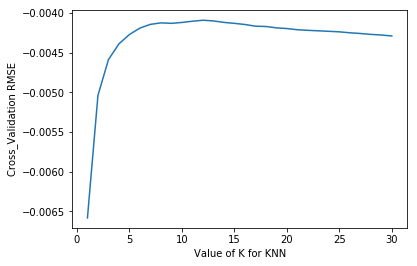

In [15]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross_Validation RMSE')

In [16]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

-0.004093296445060072
{'n_neighbors': 12}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=12, p=2,
          weights='uniform')


In [17]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
print (weight_options)

['uniform', 'distance']


In [18]:
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print (param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [19]:
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=30, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [20]:
grid.grid_scores_

[mean: -0.00658, std: 0.00038, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: -0.00658, std: 0.00038, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: -0.00504, std: 0.00038, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: -0.00502, std: 0.00037, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: -0.00459, std: 0.00042, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: -0.00457, std: 0.00041, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: -0.00439, std: 0.00034, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: -0.00437, std: 0.00034, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: -0.00427, std: 0.00032, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: -0.00425, std: 0.00033, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: -0.00419, std: 0.00031, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: -0.00416, std: 0.00031, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: -0.00415, std: 

In [21]:
# The best parameters to fit the data for the KNN model 
print (grid.best_score_)
print (grid.best_params_)

-0.004057713845942053
{'n_neighbors': 12, 'weights': 'distance'}


In [22]:
# Calculate RMSE

knn = KNeighborsRegressor(n_neighbors=12, weights = 'distance')
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = cross_val_score(knn, X, Y, cv=shuffle, scoring = "neg_mean_squared_error")
mse_scores1 = -mse_scores 
rmse_scores = np.sqrt(mse_scores1)
print ("The RMSE scores are %s" 
       % (rmse_scores))
print ("The mean of the RMSE scores is %f" 
       %(rmse_scores.mean()))

The RMSE scores are [0.06300175 0.06716461 0.06770249 0.06481728 0.05999252 0.06483361
 0.06172953 0.06208466 0.06341646 0.06366086]
The mean of the RMSE scores is 0.063840


In [23]:
# Cross Val Scores for Mean Absolute Error  
from sklearn.metrics import mean_absolute_error

knn = KNeighborsRegressor(n_neighbors=12, weights = 'distance')
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

mae_scores = cross_val_score(knn, X, Y, cv=shuffle, scoring = "neg_mean_absolute_error")
mae_scores1 = -mae_scores 

print ("The mean absolute error scores are %s" 
       % (mae_scores1))
print ("The mean of the mean absolute error scores is %f" 
       %(mae_scores1.mean()))

The mean absolute error scores are [0.04574259 0.04838024 0.04789597 0.04825059 0.04484185 0.04740489
 0.0444819  0.04572305 0.04620732 0.04551445]
The mean of the mean absolute error scores is 0.046444


In [24]:
# Cross Val Scores for Explained Variance 
from sklearn.metrics import explained_variance_score

knn = KNeighborsRegressor(n_neighbors=12, weights = 'distance')
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

ev_scores = cross_val_score(knn, X, Y, cv=shuffle, scoring = "explained_variance")

print ("The explained variance scores are %s" 
       % (ev_scores))
print ("The mean of the explained variance scores is %f" 
       %(ev_scores.mean()))

The explained variance scores are [0.59868508 0.58520584 0.58162644 0.55728981 0.63244256 0.538461
 0.60373729 0.62879564 0.59771337 0.64553456]
The mean of the explained variance scores is 0.596949


In [25]:
# Calculate R2

knn = KNeighborsRegressor(n_neighbors=12, weights = 'distance')
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
r_scores = cross_val_score(knn, X, Y, cv=shuffle, scoring = "r2")
print ("The R2 scores are %s" 
       % (r_scores))
print ("The mean of the R2 scores is %f" 
       %(r_scores.mean()))

The R2 scores are [0.59032741 0.57582387 0.56738989 0.54957507 0.62415554 0.52224804
 0.5918821  0.62466961 0.59292091 0.63688181]
The mean of the R2 scores is 0.587587


Text(0.5,1,'K-Nearest Neighbors')

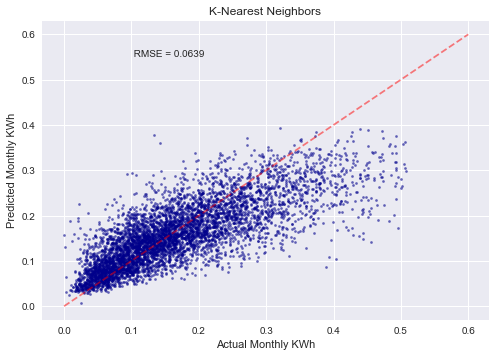

In [26]:
# Plot the Predict vs. Actual Values Using CrossValPredict
from sklearn.model_selection import cross_val_predict
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
predicted_knn = cross_val_predict(knn, X, Y, cv=shuffle)

%matplotlib inline
plt.style.use('seaborn')
plt.scatter(Y, predicted_knn, s = 5, color = 'darkblue', alpha = 0.6)
plt.plot([0,0.6], [0,0.6], "b--", color = "red", alpha = 0.5)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.text(0.1,0.55, ' RMSE = {}'.format(round(sqrt(mean_squared_error(Y, predicted_knn)), 4)))
plt.title('K-Nearest Neighbors')